<a href="https://colab.research.google.com/github/iyadh97/food-sales-predictions/blob/main/Project_Sales_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Sales Prediction**



## **Part 1 & 2**

This first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

**Part 1:**

This is an overview of the steps you will need to complete for part one of the project. There are more detailed instructions for each section following the overview.

1. Create a GitHub Account

2. Set up a GitHub repository that will house your first portfolio project.

3. Add Markdown cells with your name and section headers to the notebook.

4. Add the Google Colab Notebook to your GitHub repository.

5. Submit the link to your GitHub repo!

-------

**Part 2:**

We will continue to work off of the GitHub repository we created last week for the first portfolio project. The goal of the portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

For Part 2, the main task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

* Download the data using this link in the learn platform.
* Insert code below the heading "Loading Data"
  * Use Pandas to read the sales prediction data set into Google Colab.
  * Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
* Insert code below the heading "Data Cleaning"
  * Explore the data - what do you need to do to clean this data? Clean it!
  * Be sure to address each of the following tasks:
1. How many rows and columns?

2. What are the datatypes of each variable?

3. Are there duplicates? If so, drop any duplicates.

4. Identify missing values.

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6. Confirm that there are no missing values after addressing them.

7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

Link to the [original dataset](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

## **Data Dictionary**

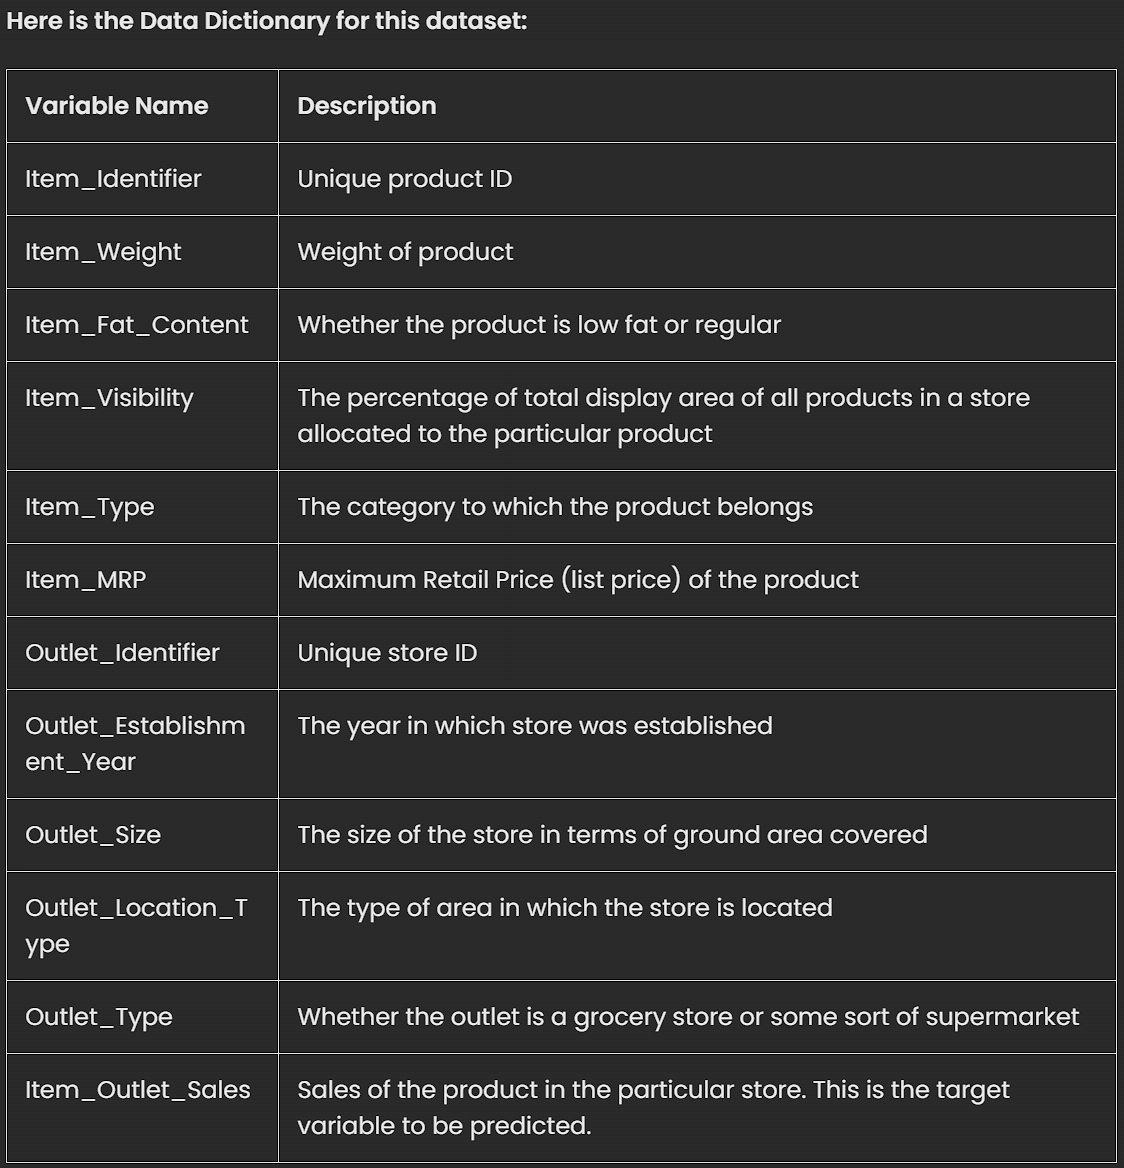

## **Import Libraries**

In [1]:
## standard imports
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import missingno

## Regression Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
# Set pandas as the default output for sklearn
set_config(transform_output='pandas')

## set pandas to display more columns
pd.set_option('display.max_columns',100)

#suppressing scientific notation, add comma & round 2 decimal pts
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")


## **Functions**

In [2]:
"""Evaluates regression model with MAE, r-squared and RMSE and prints Dataframe"""

def regression_metrics(y_true, y_pred, model_label,label='', verbose = True):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"{model_label}: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")

"""Evaluates a scikit learn regression model using r-squared and RMSE"""
def evaluate_regression(model, X_train_tf, y_train, X_test_tf, y_test,model_label='',verbose = True):
  # Get predictions for training data
  y_train_pred = model.predict(X_train_tf)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred,model_label, verbose = verbose,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test_tf)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred,model_label, verbose = verbose,
                                    label='Test Data' )

def hundred_k(y,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousand"""
    return f"${y*1e-3:,.0f}K"


""" Function to get coefficients from a linear regression model"""
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=False,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

## **Upload Data**

In [3]:
import pandas as pd
filename='/content/sales_predictions_2023.csv'

df_sales_prediction=pd.read_csv(filename)
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


## **For Part 2**,
The main task is to  use Pandas to start cleaning and exploring the data. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!


### **Inspecting Data**

### **How many rows and columns?**

In [4]:
df_copy = df_sales_prediction.copy()

In [5]:
df_sales_prediction.shape

(8523, 12)

* There are 8523 rows and 12 columns

### **verifying how many rows/columns, datatypes, missing items and duplicate rows**

In [6]:
print(df_sales_prediction.info())
print(('-'*40))
print(f'There are {df_sales_prediction.duplicated().sum()} duplicate rows.')
print(('-'*40))
print(f'Missing values :\n\n{df_sales_prediction.isna().sum()} ')
print(f'\n----There are {df_sales_prediction.isna().sum().sum()} missing Values----')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
----------------------------------------

In [7]:
#Identifying % of missing data (optional)
df_sales_prediction.isna().sum() / len(df_sales_prediction) * 100

Item_Identifier              0.00
Item_Weight                 17.17
Item_Fat_Content             0.00
Item_Visibility              0.00
Item_Type                    0.00
Item_MRP                     0.00
Outlet_Identifier            0.00
Outlet_Establishment_Year    0.00
Outlet_Size                 28.28
Outlet_Location_Type         0.00
Outlet_Type                  0.00
Item_Outlet_Sales            0.00
dtype: float64

* The dataset does not contain any duplicated rows that need to be dropped. All the rows are unique and do not require any further processing to handle duplicates.

* Missing Values:

  * There are 1463 missing values in the Item_Weight column. (17.17%)
  * There are 2410 missing values in the Outlet_Size column. (28.28%)


In [8]:
# Code to remove duplicates
#df_sales_predictions = df_sales_predictions.drop_duplicates()

### **Checking for inconsistencies in categorical columns and their counts**

In [9]:
#creating a list of object columns
categorical_columns = list(df_sales_prediction.select_dtypes(include='object'))

# Inspect unique values in each categorical column
for column in categorical_columns:
    unique_values = df_sales_prediction[column].unique()
    print(f"\nUnique values in {column}:\n {unique_values}")


Unique values in Item_Identifier:
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values in Item_Fat_Content:
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type:
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Identifier:
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values in Outlet_Size:
 ['Medium' nan 'High' 'Small']

Unique values in Outlet_Location_Type:
 ['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type:
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**there are some inconsistent categories in the 'Item_Fat_Content' column.**

In [10]:
df_sales_prediction['Item_Fat_Content']=df_sales_prediction['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

print(f"\nUnique values in Item_Fat_Content column are : \n{df_sales_prediction['Item_Fat_Content'].value_counts()}")




Unique values in Item_Fat_Content column are : 
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


### **Checking for any outliers or odd values in the data**

In [11]:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


* We will now view use df.describe() to view the summary statistics for the numeric features.

In [12]:
# Obtain summary statistics of numerical columns
summary_stats = df_sales_prediction.describe().round(3)

# Display the summary statistics
summary_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"7,060.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
std,4.64,0.05,62.27,8.37,"1,706.50"
min,4.55,0.00,31.29,"1,985.00",33.29
25%,8.77,0.03,93.83,"1,987.00",834.25
50%,12.60,0.05,143.01,"1,999.00","1,794.33"
75%,16.85,0.10,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.97"


* Here is another method to look at just the mean, min, and max for each numeric column.

In [13]:
summary_stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.86,0.07,140.99,"1,997.83","2,181.29"
min,4.55,0.00,31.29,"1,985.00",33.29
max,21.35,0.33,266.89,"2,009.00","13,086.97"


* The output of the df.describe() function indicates that the dataset's values appear consistent and without noticeable anomalies.

## **Types of Values**
**Numeric Values**

* Item_Visibility
* Item_Weight (Will be addressing missing values using Mean weight value)
* Item_MRP
* Outlet_Establishment_Year

**Ordinal Values**


* Outlet_Size (This is Small, Medium and High but I will be filling missing items with a new Unknown category)

**Nominal Values**

* Item_Identifier (Will be dropping column due * to high cardinality)
* Item_Fat_Content
* Item_Type
* Outlet_Identifier
* Outlet_Location_Type (Tier1,Tier2,Tier3)
* Outlet_Type

## **Part 3**
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, the main task is to complete any statistical analyses that might help understand, explain, or model with the data. This will include at least one of each:

* Heatmap of the correlation between features.
* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Other plots (scatterplot ...) to explore the relationships between features in our dataset.


In [14]:
df_sales_prediction.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6191,NCU54,8.88,Low Fat,0.10,Household,208.53,OUT018,2009,Medium,Tier 3,Supermarket Type2,"3,145.91"
3806,FDB40,17.50,Regular,0.01,Dairy,145.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"1,895.53"
429,FDZ27,7.93,Low Fat,0.02,Dairy,51.53,OUT045,2002,NaN,Tier 2,Supermarket Type1,848.89
7073,FDK46,9.60,Low Fat,0.05,Snack Foods,258.06,OUT018,2009,Medium,Tier 3,Supermarket Type2,"2,856.28"
6264,NCL41,12.35,Low Fat,0.04,Health and Hygiene,34.82,OUT049,1999,Medium,Tier 1,Supermarket Type1,311.59


## **Exploratory Data Analysis**

### **Correlation Heat Map**

<ipython-input-15-cd716cec4a8b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_sales_prediction.corr()


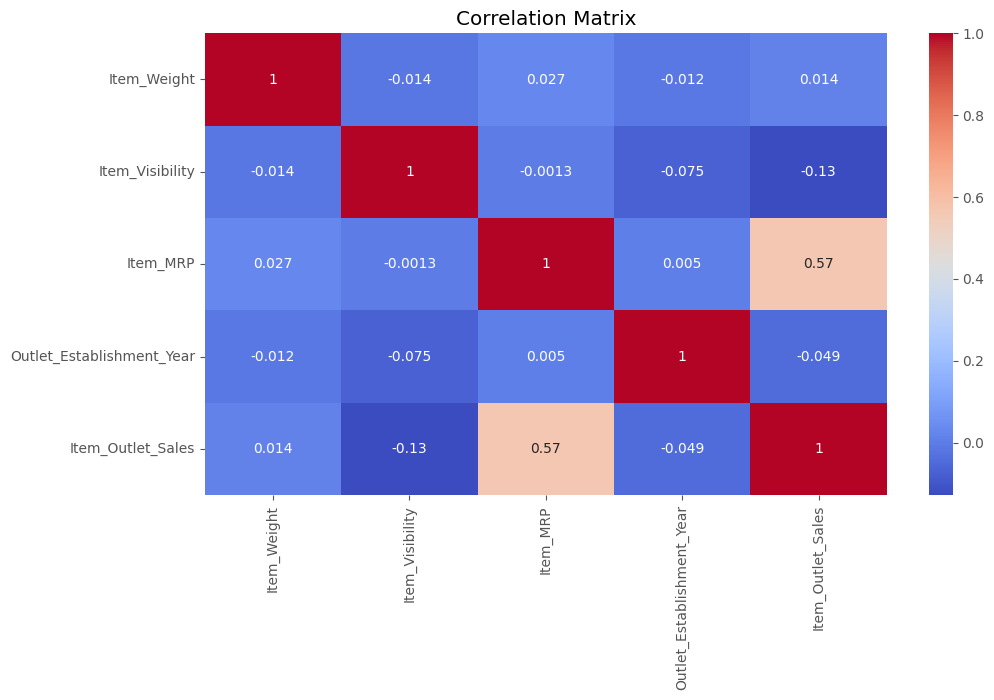

In [15]:
#creating a heat map
plt.style.use('ggplot')
plt.figure(figsize=(11, 6))
corr_matrix = df_sales_prediction.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

> After plotting the heatmap, we can observe a correlation coefficient of 0.57 between the item outlet sales and the item MRP. This correlation coefficient value indicates a moderate positive correlation between the two variables. This means that there is a tendency for higher sales to be associated with higher MRPs, but the relationship is not extremely strong.Besides that, there is pretty much no correlation between any of the other columns.





### **Creating a graph to show Item Outlet Sales by Item Type**

In [16]:
#filtering data
SalesbyItemType = df_sales_prediction.groupby('Item_Type')['Item_Outlet_Sales'].mean().round(2)
#sorting data
SortedSalesbyItemType = SalesbyItemType.sort_values()
SortedSalesbyItemType

Item_Type
Others                  1,926.14
Baking Goods            1,952.97
Soft Drinks             2,006.51
Health and Hygiene      2,010.00
Breakfast               2,111.81
Frozen Foods            2,132.87
Hard Drinks             2,139.22
Meat                    2,158.98
Breads                  2,204.13
Canned                  2,225.19
Dairy                   2,232.54
Household               2,258.78
Snack Foods             2,277.32
Fruits and Vegetables   2,289.01
Seafood                 2,326.07
Starchy Foods           2,374.33
Name: Item_Outlet_Sales, dtype: float64

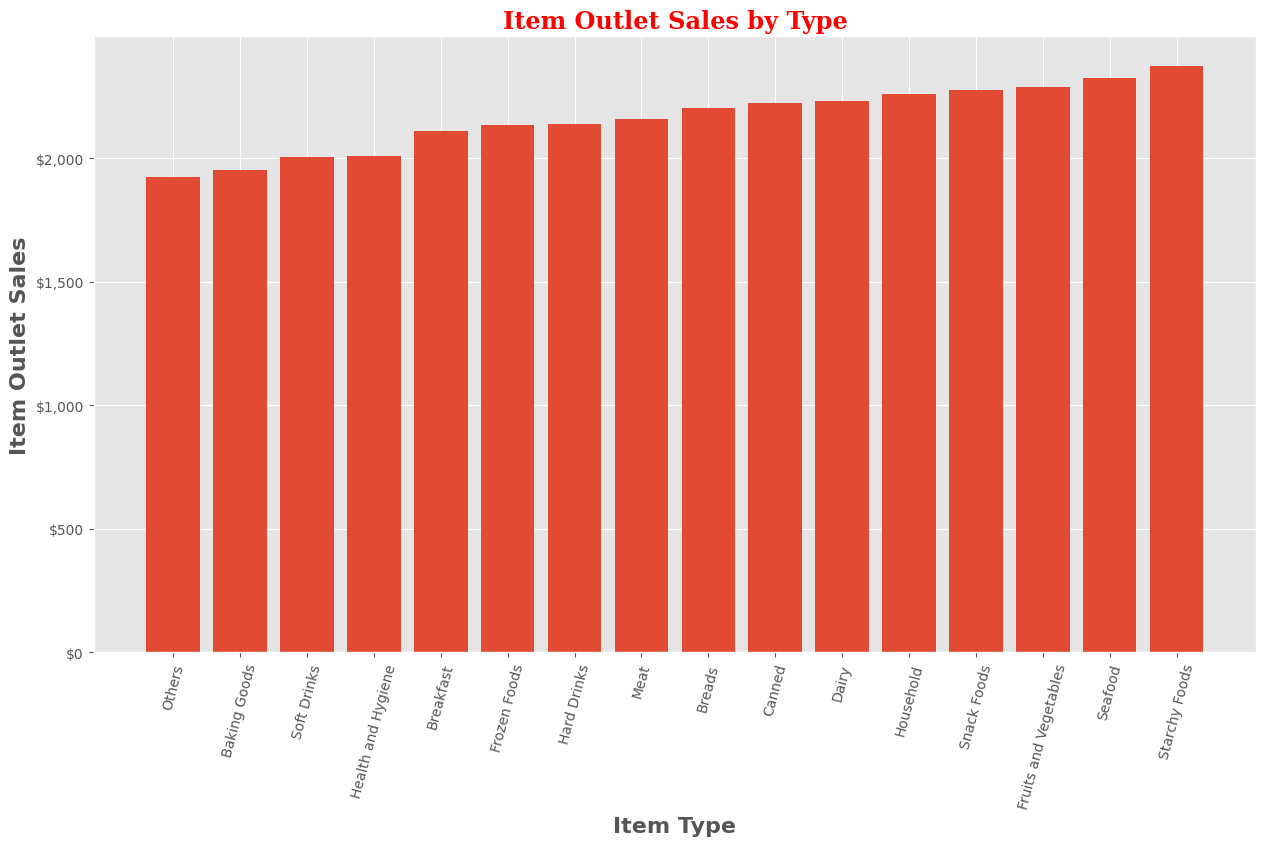

In [17]:
#plot graph
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))


plt.bar(SortedSalesbyItemType.index, SortedSalesbyItemType.values)
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.xlabel('Item Type', fontsize = 16,fontweight='bold')
plt.title('Item Outlet Sales by Type',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
plt.xticks(rotation=75);

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
## Get the fig and ax from our function
plt.show()

> Based on the graph above we know that the Starchy Food Items have the most Outlet Sales and Others has the least sales.Sales are pretty similar across all the board and we can see that there isn't an item with overwhelmingly more sales in comparison to other items.

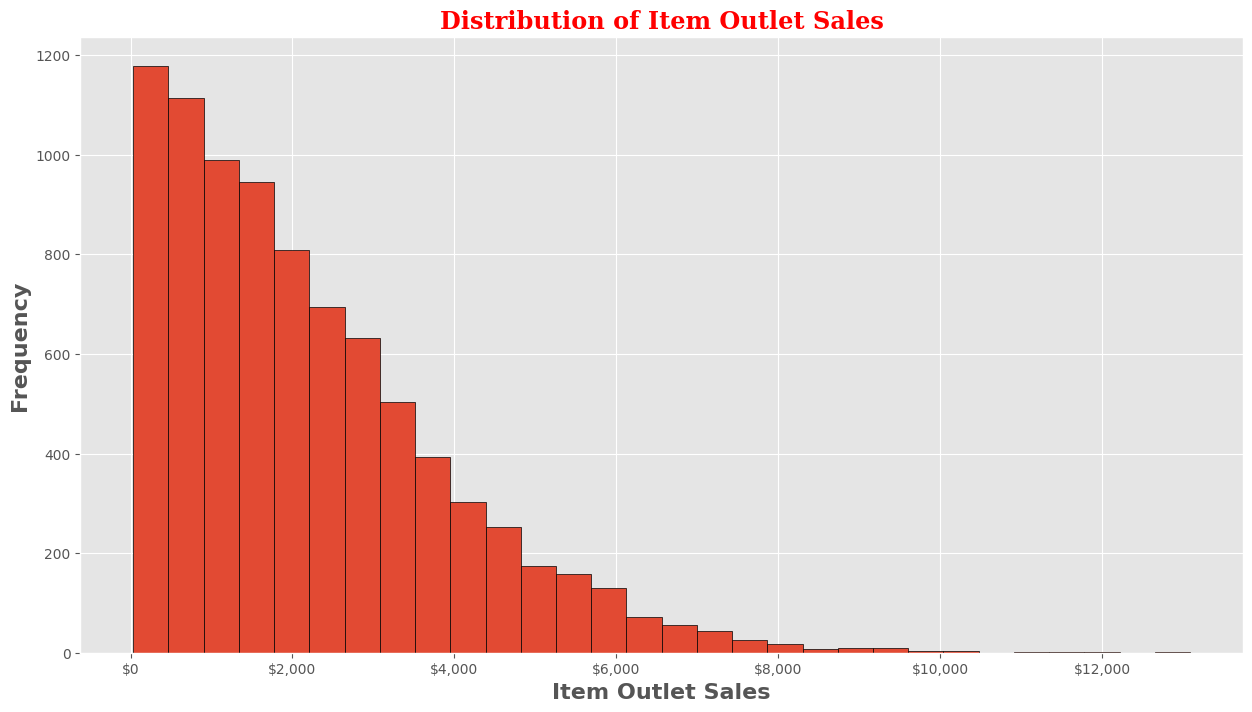

In [18]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

plt.hist(df_sales_prediction['Item_Outlet_Sales'], bins=30,edgecolor='k')
plt.xlabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.ylabel('Frequency', fontsize = 16,fontweight='bold')
plt.title('Distribution of Item Outlet Sales',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)
plt.show()

**we can see that the number of outlet sales is decreasing while the price is increasing**
* this is a Right-skewed distribution (positively skewed)

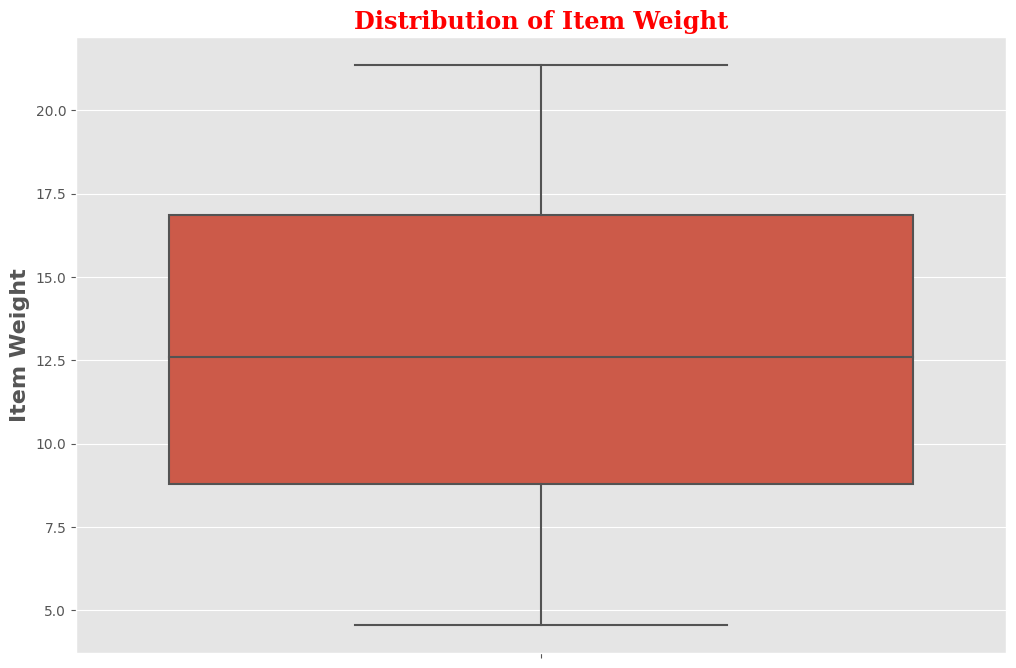

In [19]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=df_sales_prediction, y='Item_Weight')
plt.ylabel('Item Weight', fontsize = 16,fontweight='bold')
plt.title('Distribution of Item Weight',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
plt.show()

The box plot is comparatively short This suggests that overall Weight of items  have a high level. The longer the box, the more dispersed the data. The smaller, the less dispersed the data.

the median is closer to the top of the box, and the whisker is shorter on the upper end of the box, so the distribution is negatively skewed (skewed left).

Outliers: There are no outliers in the item weight boxplot.

### **Creating a graph and boxplot to show Item Outlet Sales by Outlet Type**

In [20]:
#filtering data
SalesbyOutletType = df_sales_prediction.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().round(2)
#sorting data
SortedSalesbyOutletType = SalesbyOutletType.sort_values()
SortedSalesbyOutletType

Outlet_Type
Grocery Store         339.83
Supermarket Type2   1,995.50
Supermarket Type1   2,316.18
Supermarket Type3   3,694.04
Name: Item_Outlet_Sales, dtype: float64

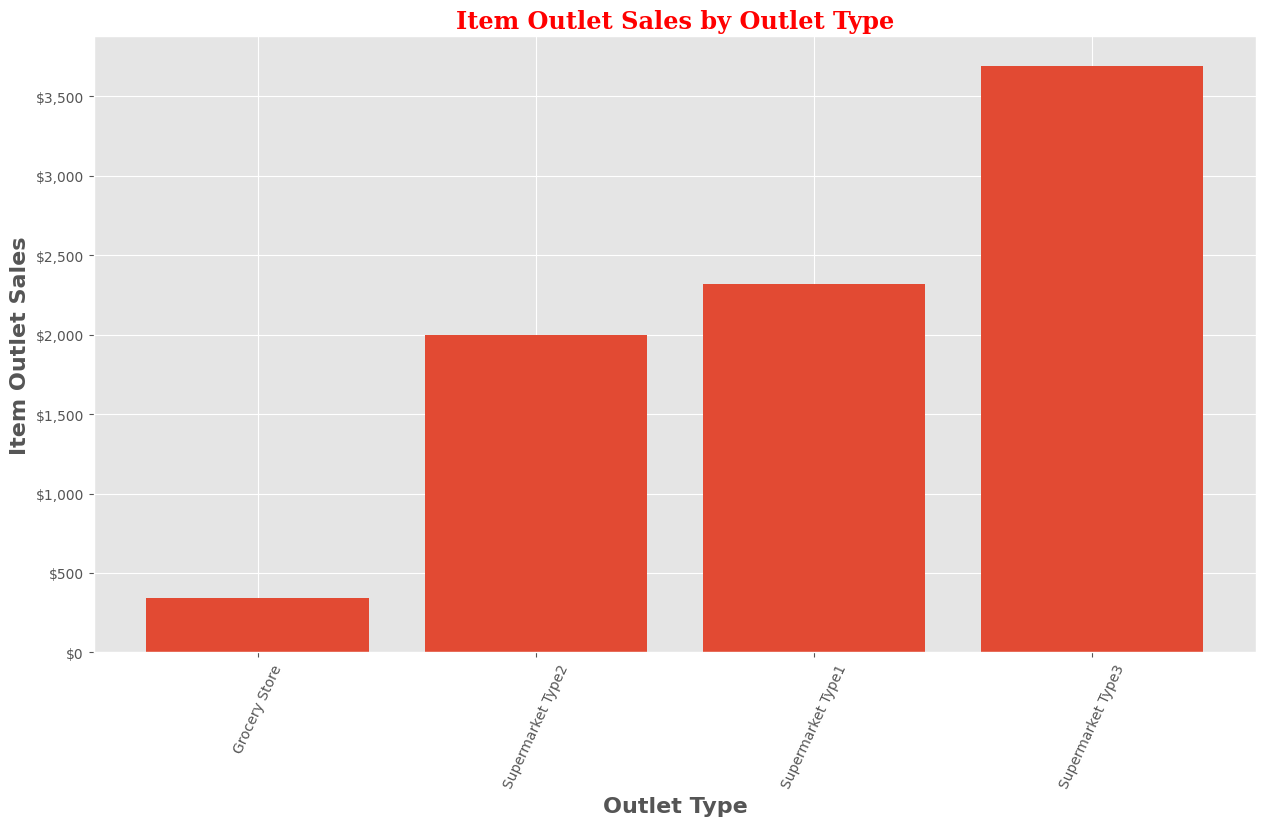

In [21]:
#plot graph

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(SortedSalesbyOutletType.index, SortedSalesbyOutletType.values)
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.xlabel('Outlet Type', fontsize = 16,fontweight='bold')
plt.title('Item Outlet Sales by Outlet Type',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
plt.xticks(rotation=65);


## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
plt.show()


> We can see from the above graph that there is definitely a difference between the Outlet with the most and least sales. Supermarket Type 3 has the most Outlet Item Sales and Grocery Store has the least amount of Item Outlet Sales.

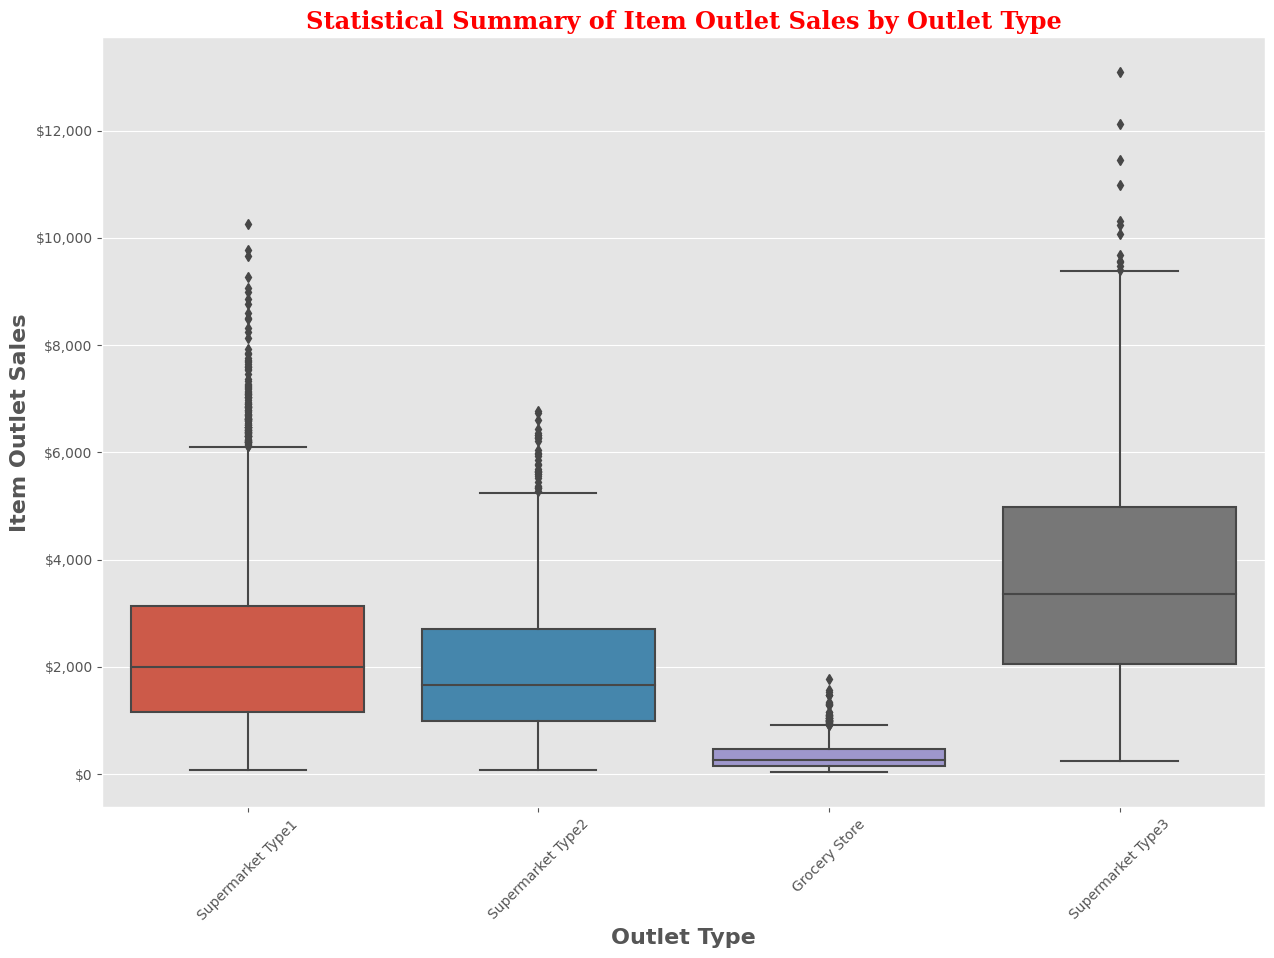

In [22]:
# Create boxplot for 'Item_Outlet_Sales' by 'Outlet_Type' to further explore the difference

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,10))


sns.boxplot(data=df_sales_prediction, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xlabel('Outlet Type', fontsize = 16,fontweight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.title('Statistical Summary of Item Outlet Sales by Outlet Type',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
plt.xticks(rotation=45);


## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
plt.show()


The supermarket Type 3 has the highest median than the other boxes. Therefore The supermarket Type 3 box did better on average as it have the largest median.

in the box plot below it can be seen that The supermarket Type 3 box has a larger spread than the others:

The supermarket Type 3 box has a longer plot from whisker to whisker. Therefore it has a larger range. On a boxplot we can see this visually.

The supermarket Type 3 box has a longer box portion of the boxplot and so, it has a larger interquartile range. We can also see this visually.

Because Grocery Store box has the smallest range and interquartile range, it has the most consistent results.

all 4 boxes have a positive skew(Right skew) with the highest number of outliers in The supermarket Type 1 box compared to the other boxes

### **Creating a graph to show Item Outlet Sales by Outlet Size**

In [23]:
#filtering data
SalesbyOutletSize = df_sales_prediction.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().round(2)
#sorting data
SortedSalesbyOutletSize = SalesbyOutletSize.sort_values()
SortedSalesbyOutletSize

Outlet_Size
Small    1,912.15
High     2,299.00
Medium   2,681.60
Name: Item_Outlet_Sales, dtype: float64

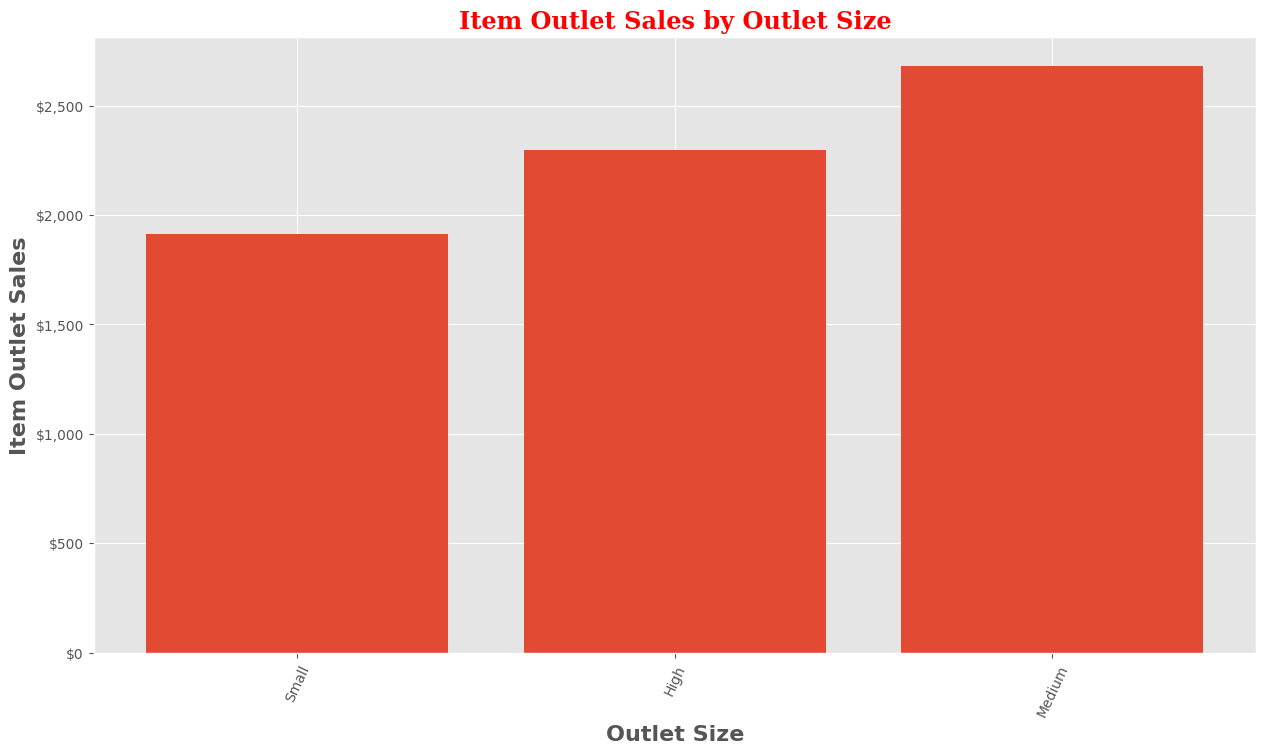

In [24]:
#plot graph
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(SortedSalesbyOutletSize.index, SortedSalesbyOutletSize.values)
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.xlabel('Outlet Size', fontsize = 16,fontweight='bold')
plt.title('Item Outlet Sales by Outlet Size',fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red')
plt.xticks(rotation=65);

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
## Get the fig and ax from our function
plt.show()

> The graph above shows that Medium sized outlets sell the most and Small outlets sell the least.

# **Part 4**

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

In [25]:
df_sales_prediction.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


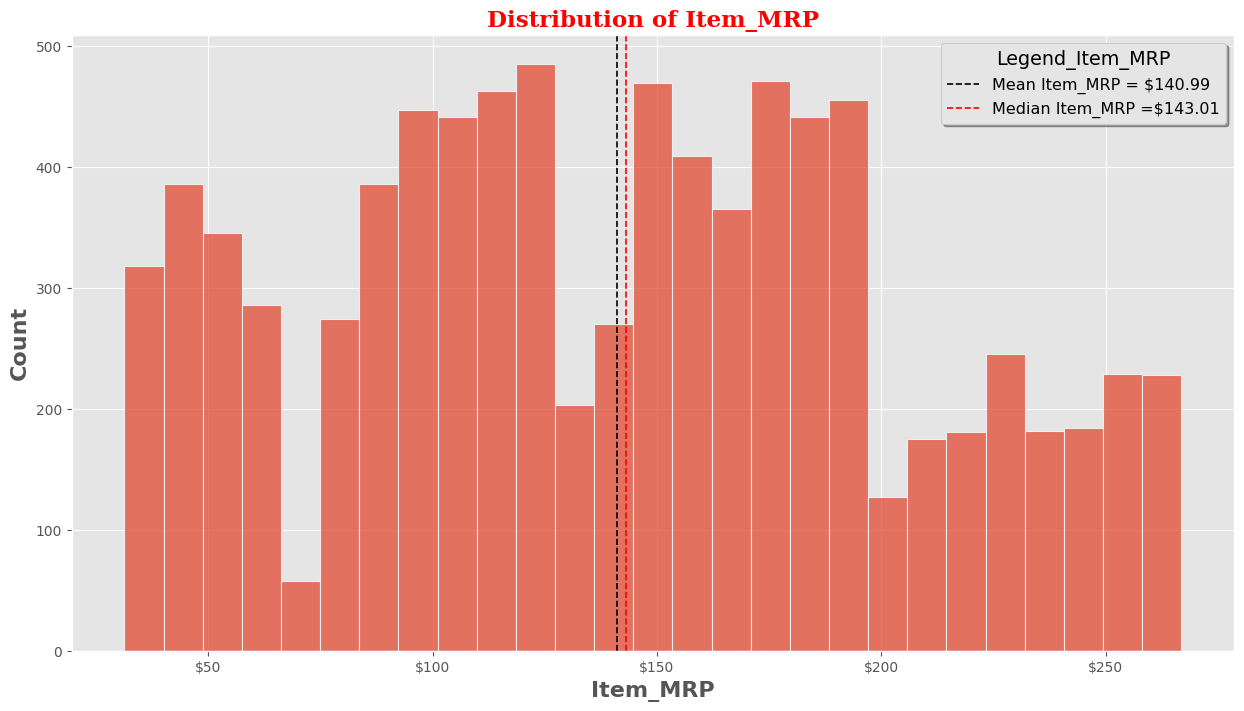

In [26]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

## Plot histogram
sns.histplot(data=df_sales_prediction, x='Item_MRP', ax=ax)

ax.set_title('Distribution of Item_MRP',
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold',
             color='red');

## Annotating mean and median
mean_Item_MRP = df_sales_prediction['Item_MRP'].mean()
ax.axvline(mean_Item_MRP, color='k', ls='--', label=f"Mean Item_MRP = ${mean_Item_MRP:.2f}")

med_Item_MRP = df_sales_prediction['Item_MRP'].median()
ax.axvline(med_Item_MRP, color='r', ls='--', label=f"Median Item_MRP =${med_Item_MRP:.2f}") #OR round(med_price,2)

plt.xlabel('Item_MRP', fontsize = 16,fontweight='bold')
plt.ylabel('Count', fontsize = 16,fontweight='bold')

plt.legend(title ='Legend_Item_MRP',title_fontsize='x-large',loc='best',frameon=True,fontsize='large',shadow=True);

## Make price_fmt using the StrMethodFormatter and the appropriate format code
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(price_fmt)
## Get the fig and ax from our function
plt.show()



### PS:MRP definition "to refresh memory"
* MRP, the Maximum Retail Price is the full form of MRP. The manufacturer of a product calculates it, and it is the highest possible price one can charge for that product from a customer. It comprises all the taxes levied on that product.

* The objective of having a maximum retail price is to ensure that the customers are not charged anything beyond that amount. Moreover, with MRP printed on a product’s packaging, sellers’ scope to sell goods to customers at a higher price becomes negligible. Therefore, it restricts the shopkeepers from fooling the customers by charging anything above the product’s printed price.
*******************************

<ipython-input-27-44a35fe13c2c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


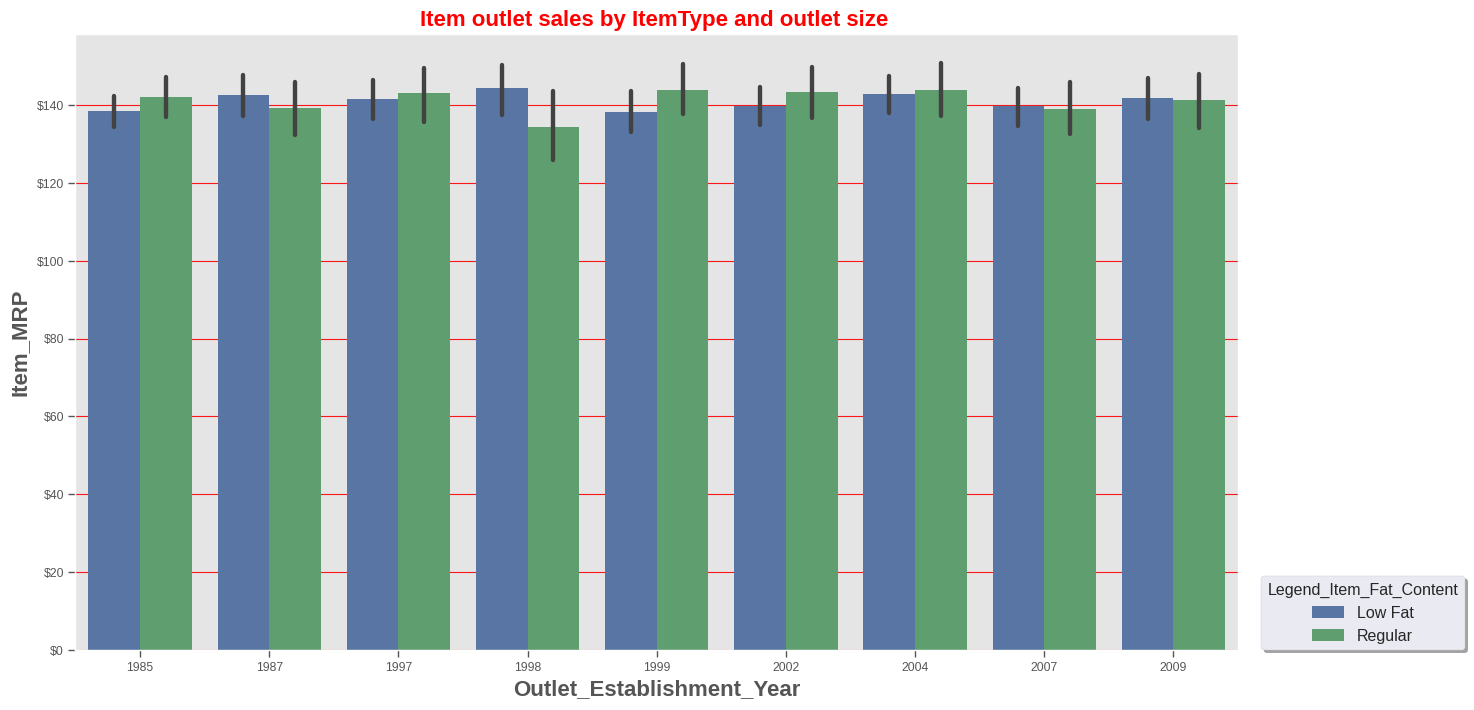

In [27]:

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

plt.style.use('seaborn')

sns.barplot(data=df_sales_prediction, y='Item_MRP',x='Outlet_Establishment_Year',hue='Item_Fat_Content');

#plt.xticks(rotation = 45);
plt.title('Item outlet sales by ItemType and outlet size ',fontsize = 16,color='red',fontweight='bold');
plt.grid(axis = 'y',
         c='red',
         alpha = .9,linestyle = '-')

plt.xlabel('Outlet_Establishment_Year', fontsize = 16,fontweight='bold')
plt.ylabel('Item_MRP', fontsize = 16,fontweight='bold')

## Make mrp_fmt using the StrMethodFormatter and the appropriate format code
mrp_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.yaxis.set_major_formatter(mrp_fmt)


plt.legend(title ='Legend_Item_Fat_Content',title_fontsize='large',loc=(1.02,0),frameon=True,fontsize='large',shadow=True);

**Based on the above graph:**

Item MRP for Low Fat items is higher in the following years:

* 1987
* 1998
* 2007
* 2009

Item MRP for Regular Fat items is higher in the following years:

* 1985
* 1997
* 1999
* 2002
* 2004


### **Creating a Scatter Plot of Item MRP vs. Item Outlet Sales:**

<ipython-input-28-beeb76ed00b9>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


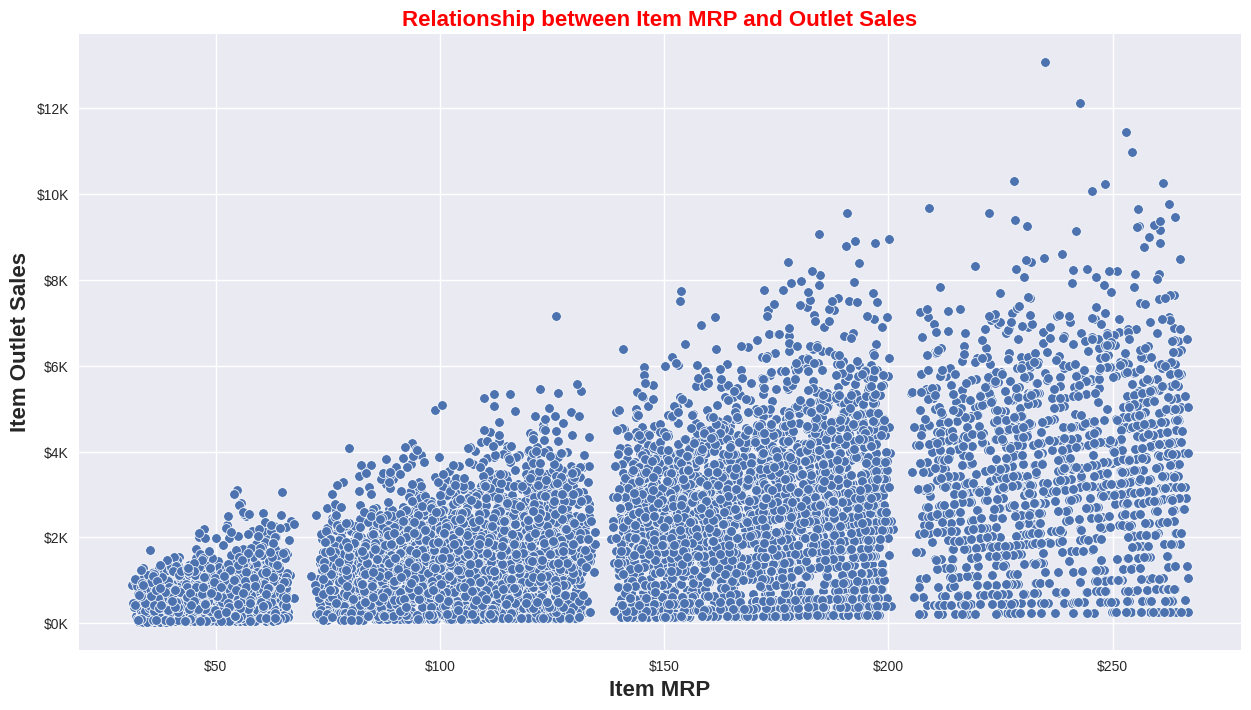

In [28]:
#Scatter Plot of Item MRP vs. Item Outlet Sales:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(15,8))

# choosing final context
sns.set_context('paper')

plt.style.use('seaborn')


sns.scatterplot(data=df_sales_prediction, x='Item_MRP', y='Item_Outlet_Sales')
plt.xlabel('Item MRP', fontsize = 16,fontweight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16,fontweight='bold')
plt.title('Relationship between Item MRP and Outlet Sales',fontsize = 16,color='red',fontweight='bold');
## Set the axis' major formatter

sales_fmt_100k = FuncFormatter(hundred_k)
ax.yaxis.set_major_formatter(sales_fmt_100k)

mrp_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.xaxis.set_major_formatter(mrp_fmt)
plt.show()

This scatter plot shows the relationship between the item maximum retail price (MRP) and the corresponding outlet sales. Each point on the plot represents a specific item, with its MRP on the x-axis and the sales generated from the outlet on the y-axis. The plot helps identify any potential correlation or patterns between the MRP and sales, such as whether higher-priced items tend to generate higher sales.

**and in this case the higher the item MRP is, the higher sales (item outlet_sales) it generates**

*****************

### **Creating a Chart showing Sales grouped by both Item Types and the Item Fat Content**

In [29]:
#filtering data
Itemtypes = df_sales_prediction.groupby(['Item_Type','Item_Fat_Content']).mean().reset_index()
#sorting data
Itemtypes = Itemtypes.sort_values(by = 'Item_Outlet_Sales')
#displaying last 5 rows
Itemtypes[:5]

<ipython-input-29-ffeacc27b262>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Itemtypes = df_sales_prediction.groupby(['Item_Type','Item_Fat_Content']).mean().reset_index()


,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Baking Goods,Low Fat,12.55,0.07,120.53,"1,997.31","1,764.51"
25,Soft Drinks,Regular,11.23,0.07,121.77,"1,997.80","1,854.07"
20,Seafood,Low Fat,13.81,0.05,113.51,"1,997.19","1,907.79"
5,Breakfast,Regular,13.34,0.08,127.84,"1,997.36","1,925.46"
19,Others,Low Fat,13.85,0.06,132.85,"1,997.66","1,926.14"


<ipython-input-30-43cceb3bb673>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


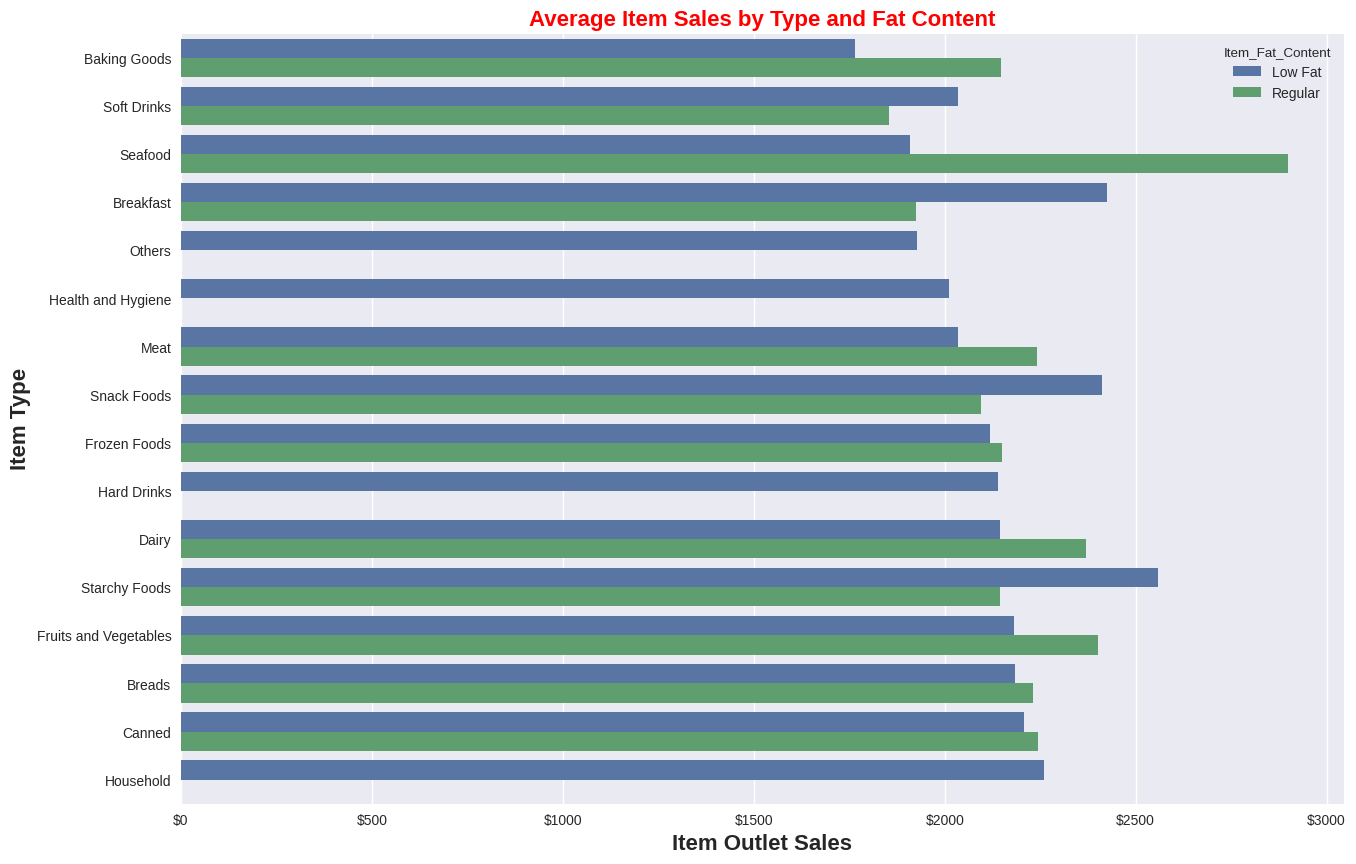

In [30]:
#plot graph
fig, ax = plt.subplots(figsize=(15,10))
# choosing final context
sns.set_context('paper')
plt.style.use('seaborn')


sns.barplot(data = Itemtypes, x = 'Item_Outlet_Sales', y = 'Item_Type', hue = 'Item_Fat_Content')
plt.title('Average Item Sales by Type and Fat Content',fontsize = 16,color='red',fontweight='bold')
plt.ylabel('Item Type', fontsize = 16,fontweight='bold')
plt.xlabel('Item Outlet Sales', fontsize = 16,fontweight='bold');

## Set the axis' major formatter
sales_fmt_100k = FuncFormatter(hundred_k)
ax.xaxis.set_major_formatter(sales_fmt_100k)

mrp_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.xaxis.set_major_formatter(mrp_fmt)
plt.show()

**Based on the above graph:**

Item Outlet Sales sell more Low Fat items in the following categories:

* Soft Drinks
* Breakfast
* Snack Foods
* Starchy Foods

Item Outlet Sales sell more Regular items in the following categories:

* Baking Goods
* Seafood
* Mean
* Frozen Foods
* Dairy
* Fruits & Vegetables
* Breads
* Canned

The below items only have one category of items since they would fall outside of the what is considered Low Fat and Regular:

* Household
* Others
* Health & Hygiene
* Hard Drinks

<ipython-input-31-5f314dba080e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


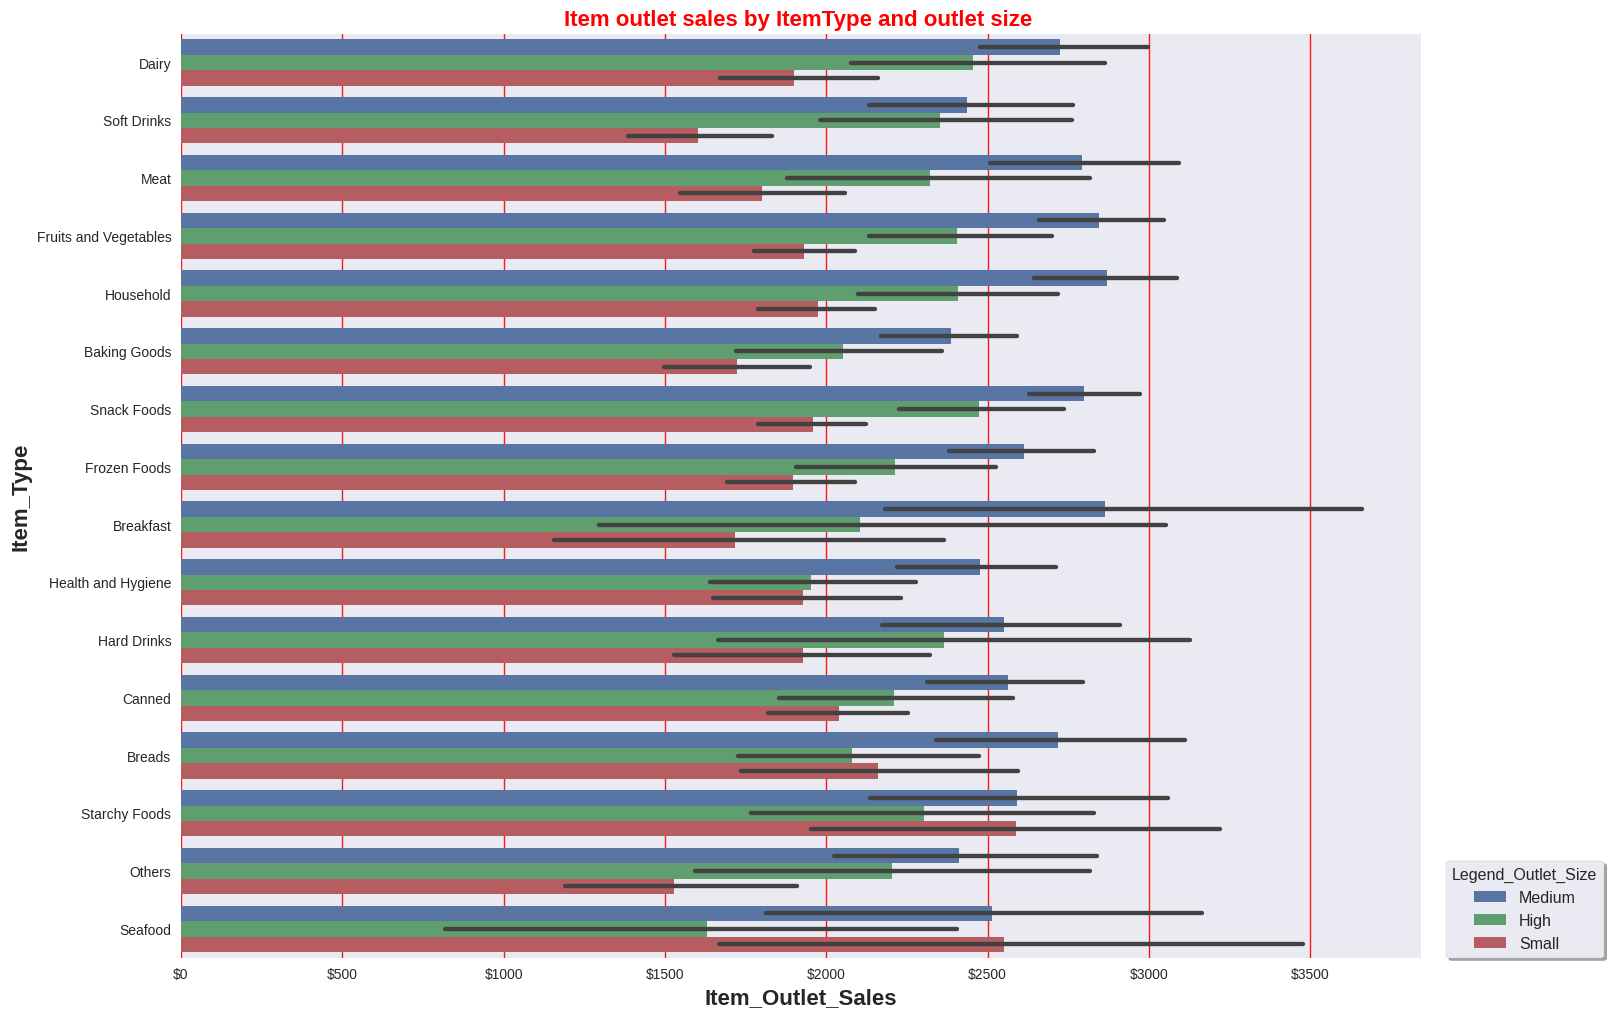

In [31]:
from matplotlib.ticker import FuncFormatter


## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(16,12))


plt.style.use('seaborn')
sns.barplot(data=df_sales_prediction, x='Item_Outlet_Sales', y='Item_Type',hue='Outlet_Size');

#plt.xticks(rotation = 45);
plt.xlabel('Item_Outlet_Sales', fontsize = 16,fontweight='bold')
plt.ylabel('Item_Type', fontsize = 16,fontweight='bold')

plt.title('Item outlet sales by ItemType and outlet size ',fontsize = 16,color='red',fontweight='bold');
plt.grid(axis = 'x',
         c='red',
         alpha = .9,linestyle = '-')
plt.legend(title ='Legend_Outlet_Size',title_fontsize='large',loc=(1.02,0),frameon=True,fontsize='large',shadow=True);

sales_fmt = mpl.ticker.StrMethodFormatter('${x:.0f}')
ax.xaxis.set_major_formatter(sales_fmt)

**Using this barplot, we can observe all the Item outlet sales by ItemType (Frozen Foods, Seafood, soft Drinks etc...) and outlet size (small, medium and high)**

**Based on the above graph:**

We can tell that the Item Outlet Sales sell more medium Size items in all categories except for the Seafood

-------------
-------------

# **Part 5 : Preprocessing data for ML**


We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

**PS:**
* Before splitting the data, we droped  duplicates and fixed inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, we performed this step before the split)

## We will
* Identify the features (X) and target (y): Assigning the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as our features matrix.
* Perform a train test split
* Create a preprocessing object to prepare the dataset for Machine Learning
* Make sure our imputation of missing values occurs after the train test split using SimpleImputer.


----
-------

## **Preprocessing data for ML**

-------
-------

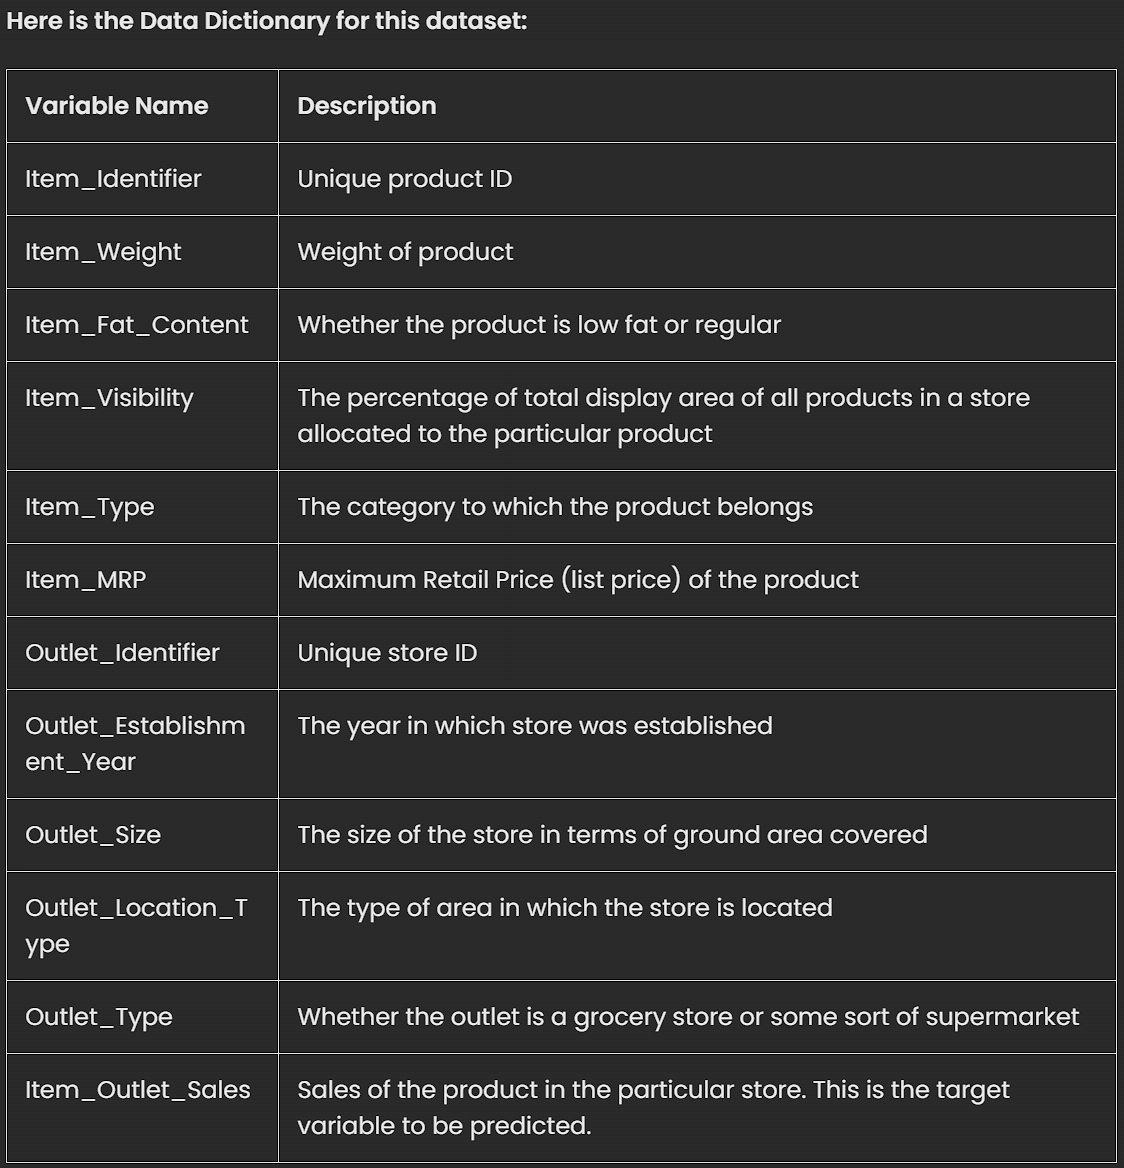

### **start the cleaning process over to ensure there is no data leakage!**

In [32]:
df_sales_prediction.info()
print("------------------------------------------\n")
df_sales_prediction.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
------------------------------------------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [33]:
df_sales_prediction['Item_Identifier'].nunique()

1559

In [34]:
#dropping Item_Identifier due to high cardinality(too many unique values)
df_sales_prediction.drop(columns=['Item_Identifier'],inplace=True)
#confirming column was dropped
df_sales_prediction.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')


> I droped the 'Item_Identifier' column due to high cardinality, (1559 is a high number of unique labels or classes). High cardinality will create a very sparse dataset when it is One Hot Encoded, which can negatively impact the models' metrics, and greatly increase processing times.

### **Verifying Missing Values**

In [35]:
df_sales_prediction.isna().sum()


Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* I will address the missing items in the 'Item_Weight' column with a Mean SimpleImputer after splitting my data  to **avoid any data leakage**.
* For 'Outlet_Size' I decided to add a 'MISSING' category since the amount of missing data (2410) is very similar to the counts of other categories.

### **Validation Split**

Separate the data into the feature matrix (X) and the target vector (y)
Item_Outlet_Sales will be the target y
The rest of the features will be X
the random number 42 for consistency.

In [36]:
# Define features and target
X = df_sales_prediction.drop(columns = ['Item_Outlet_Sales'])
y = df_sales_prediction['Item_Outlet_Sales']

# Splitting data into Training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.35,Low Fat,0.03,Household,256.46,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.25,Regular,0.00,Snack Foods,179.77,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.35,Regular,0.16,Meat,157.29,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.97,Low Fat,0.01,Baking Goods,82.33,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.35,Low Fat,0.02,Frozen Foods,120.91,OUT045,2002,NaN,Tier 2,Supermarket Type1


## **Create a ColumnTransformer to preprocess the data.**

* 1)Creating lists of column names for numeric and categorical columns.
* 2)Creating a StandardScaler for scaling numeric columns.
* 3)Creating a OneHotEncoder for one-hot encoding the categorical columns.
* 4)Creating a tuple for each transformer with the: name, the transformer object, and the list of columns.
* 5)Using the tuples to create a ColumnTransformer to preprocess the data. Make sure to set verbose_feature_names_out to False!

### **1)Create Pipelines and Define Tuples**

* **Numeric Pipeline**

Our numeric pipeline will:

1. Impute missing values

2. Scale the data.


**PS :**

* In this approach, I filled the missing values in the "**Item_Weight**" column with the mean of the available values. This is a reasonable choice as the mean provides a representative value without significantly affecting the overall distribution.

In [37]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# instantiate preprocessors
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe


Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

### **Define Numeric Tuple for ColumnTransformer**

**Note:When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:**

* the name we want to use for the pathway.
  * (We will call this pipeline "numeric".)
* the pipeline or transformer.
  * (We will use the num_pipe we just created.)
* the list of column names that should be sent through the pathway.
  * (We will apply this to the previously defined num_cols.)

In [38]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

* <font color ='red'> **Ordinal Pipeline**

Our ordinal pipeline will:

* 1) Impute missing values with "most_frequent".
* 2) Encode the features ordinally.
* 3) Scale the encoded features.



**PS:**

* For the "**Outlet_Size**" column, I filled the missing values with(most_frequent value) of the column. This is a suitable choice as the mode represents the most common outlet size and can help maintain the consistency of the data.
*************************************

In [39]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_col = ["Outlet_Size"]
print("Ordinal Column:", ord_col)

# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='most_frequent')

## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Outlet_Size Columms
Outlet_Size_order = ['Small','Medium', 'High']

# Making the list of order lists for OrdinalEncoder
ordinal_category_order = [Outlet_Size_order]

ord_encoder = OrdinalEncoder(categories=ordinal_category_order,handle_unknown='use_encoded_value', unknown_value=-1)

# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()

## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Column: ['Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='most_frequent',
                               strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High']],
                                handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('standardscaler', StandardScaler())])

### **Define Ordinal Tuple for ColumnTransformer**

When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:

* the name we want to use for the pathway.
  * (We will call this "ordinal".)
* the pipeline or transformer.
  * (We will use the ord_pipe we just created)
* the list of column names that should be sent through the pathway.
  * (We will use our previously defined org_col)

In [40]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_col)
ord_tuple


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='most_frequent',
                                strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High']],
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1)),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

### <font color ='red'> **Categorical Pipeline**

Our categorical pipeline will:

* 1) Impute missing values with "MISSING".
* 2) One-Hot-Encode the categories for each feature.

In [41]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_col).columns
print("OneHotEncoder Columns:", ohe_cols)

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "MISSING")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe


OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### **Define Categorical Tuple for ColumnTransformer**

When we create the column transformer, we will need a tuple for each pipeline that contains 3 things:

* the name we want to use for the pipeline.
  * (We will call this "categorical.")
* the pipeline or transformer.
  * (We will use the ohe_pipe we just created.)
* the list of column names that should be sent through the pathway.
  * (We will use our previously defined ohe_cols)

In [42]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

## **2) Instantiate the ColumnTransformer**

We now need to instantiate the ColumnTransformer. The ColumnTransformer needs a list of our preprocessing tuples as the first argument.

By default, ColumnTransformer creates "verbose feature names" that include the name of the pipeline as a prefix before two underscores and then the actual feature names. For example, "Item_Weight" would become "numeric__Item_Weight".

While this is informative, we prefer to have simple feature names. To do so, we can include **`verbose_feature_names_out=False`** when we instantiate our ColumnTransformer.

In [43]:
# Instantiate with verbose_feature_names_out=False
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='constant')),
                                                 ('ordinalencoder...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

We can see above that we have 3 branches of our ColumnTransformer (numeric, ordinal, and categorical - the names we chose).

### **3) Fit the Transformer on Training Data Only**

Now we will fit the column transformer. During the fit step, the transformers will learn/calculate everything for each transformation in a single step.

In [44]:
# Fit on training data
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='constant')),
                                                 ('ordinalencoder...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

**As always, the fit step is just acquiring the information, but it does not apply any changes yet.**

### **4a) and 4b) Transform Training and Test data**

In [45]:
# Transform the training data
X_train_tf = preprocessor.transform(X_train)
# Transform the testing data
X_test_tf = preprocessor.transform(X_test)
# View the processed training data
X_train_tf.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.82,-0.71,1.83,1.33,0.75,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
7510,0.56,-1.29,0.60,1.33,0.75,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
5828,-0.13,1.81,0.24,0.14,0.75,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
5327,-1.17,-1.00,-0.95,0.73,-0.26,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4810,1.53,-0.97,-0.34,0.49,-1.28,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


With ColumnTransformer all of our transformations occurred simultaneously, and our training and testing dataframes are ready for modeling!

In [46]:
#Confirm that all columns are numeric dtypes.
X_train_tf.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Outlet_Size                        float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Iden

**All columns in the dataset now have numeric data types. There are no more non-numeric or categorical columns present**

In [47]:
#description of the final result (training data)
X_train_tf.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,"6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00","6,392.00"
mean,0.00,-0.00,0.00,-0.00,0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.10,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.30,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.98,-1.29,-1.77,-1.53,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.81,-0.76,-0.76,-1.29,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,-0.23,0.03,0.14,-0.26,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.76,0.56,0.72,0.73,0.75,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.00,5.13,1.99,1.33,1.76,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**The original numeric features have been appropriately scaled, resulting in standardized values with a mean approximately equal to 0 and a standard deviation close to 1. This scaling process ensures that all numeric features have a consistent range, making them more comparable and suitable for various machine learning algorithms that benefit from standardized data.**

----

> # **Modeling**





-----------------------------------------
-----------------------------------------
## **Model 1 - Linear Regression**
-----------------------------------------
-----------------------------------------

In [48]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='most_frequent',
                                                                strategy='constant')),
                                                 ('ordinalencoder...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

### **Import and instantiate the model.**
Define the model with an appropriate name. Here we chose lin_reg. We instantiated the model with no arguments, so we will use the default model.

In [49]:
## fitting default linear regression model
## Make and fit model
lin_reg = LinearRegression()




### **Train the model on your training data.**
This is the step where the model "learns" about the relationship between the features (X) and the target (y).

In [50]:
#Fit the model on the training data
lin_reg.fit(X_train_tf, y_train )

LinearRegression()

### **Use the model to make predictions for training and testing data an Evaluate the Results**

In [51]:
evaluate_regression(lin_reg, X_train_tf, y_train, X_test_tf,y_test,'Linear Regression')

------------------------------------------------------------
Linear Regression: Training Data
------------------------------------------------------------
- MAE = 847.132
- MSE = 1,297,560.929
- RMSE = 1,139.105
- R^2 = 0.562

------------------------------------------------------------
Linear Regression: Test Data
------------------------------------------------------------
- MAE = 804.130
- MSE = 1,194,369.710
- RMSE = 1,092.872
- R^2 = 0.567


### **Linear Regression Model Observations**
This score can be interpreted as saying that our model can account for about 56% of the variation in y_test using the features in X_test.

* This model performs poorly, around (56%) on the training and testing set.
* Most likely, this data is not well suited for a Linear Model.
* Therefore, we will explore using other models to see how they perform.

-----------------------------------------
-----------------------------------------
## **Model 2 -Decision Tree**
-----------------------------------------
-----------------------------------------

In [52]:
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state = 42)

In [54]:
#  Fit the model on the training data only
dec_tree.fit(X_train_tf, y_train)

# Evaluate with custom function
evaluate_regression(dec_tree, X_train_tf, y_train, X_test_tf,y_test,'Decision Tree')

------------------------------------------------------------
Decision Tree: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Decision Tree: Test Data
------------------------------------------------------------
- MAE = 1,026.072
- MSE = 2,171,452.374
- RMSE = 1,473.585
- R^2 = 0.213


Consider the R2. The test set had an R2 of .213, while the training data had perfect results. **The default model is notably overfit**.

### **Tune the Model.**
To explore what can be tuned for a model, it can be very helpful to use the .get_params() method. The output will be all of the parameters you can adjust when you instantiate that type of model.

In [55]:
#Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [56]:
# Get depth of tree with default model
depth_used = dec_tree.get_depth()
depth_used

40

In [63]:
# Define Param Grid
param_grid = {'max_depth' : (np.arange(5,depth_used,1)),
              'min_samples_leaf' : np.arange(1,11)}

In [64]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(dec_tree, param_grid, n_jobs = -1, verbose = 1)

**n_jobs:**This parameter specifies the number of CPU cores to be used for the computation. Setting it to -1 means using all available cores.

**verbose:** This parameter controls the verbosity of the output. A value of 1 means that progress messages will be printed during the search.

In [65]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train_tf, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             verbose=1)

In [66]:
# Obtain best values
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 8}

In [67]:
# Define the best version of the model already refitted on entire training set
best_model = grid_search.best_estimator_

In [68]:
# Use custom function to evalute the model
evaluate_regression( best_model, X_train_tf, y_train, X_test_tf, y_test,'Decision Tree')

------------------------------------------------------------
Decision Tree: Training Data
------------------------------------------------------------
- MAE = 762.612
- MSE = 1,172,146.491
- RMSE = 1,082.657
- R^2 = 0.604

------------------------------------------------------------
Decision Tree: Test Data
------------------------------------------------------------
- MAE = 738.360
- MSE = 1,118,064.645
- RMSE = 1,057.386
- R^2 = 0.595


**`Training Data Performance:`** The old output showed a perfect fit to the training data, with MAE, MSE, RMSE, and R^2 all being ideal values. However, this indicates a classic case of overfitting, where the model learned the training data's noise as well as the underlying pattern.

**`Generalization to Test Data:`** While the old output had perfect training performance, it did not generalize well to the test data. The significant drop in performance metrics on the test data (higher MAE, MSE, RMSE, lower R^2) highlighted the model's inability to handle new, unseen data.

**`Improvement After Grid Search:`** The new output, after grid search, demonstrates improved generalization to the test data. Although the training performance is not perfect, the model's ability to predict on unseen data has significantly improved. MAE, MSE, and RMSE values are lower, and R^2 is higher on the test data **compared to the old output.**

**Balanced Model:** The new output suggests that the model is striking a better balance between fitting the training data and generalizing to new data. It captures the underlying patterns without being overly influenced by noise.

* **`In summary`**

the new output represents a more balanced and improved model that is better suited for real-world scenarios.**While it may not have achieved perfect training performance**, **it shows enhanced performance on the test data**, indicating a better ability to make accurate predictions on unseen data. **This shift from overfitting to better generalization**(R^2 on the training and testing data are very close around 60%)suggests that the model is more likely to perform better on new data it encounters in real-world applications.

--------

* Comparing both the Decision Tree and Linear Regression models, the Decision Tree Model performed slightly better overall. I utilized various regression metrics to evaluate and compare both models and the Decision Tree model had better results.

* Although I was able to improve the Decision tree model in its prediction perfomance, I would hightly recommned gathering other relevant features that would help with Item Sales predictions. It can be concluded that this model has a high bias which would not be super reliable when making predictions.

-----------------------------------------
-----------------------------------------
## **Model 3 - Random Forests**
-----------------------------------------
-----------------------------------------

**Random Forest** introduces an extra layer of randomness by selecting a subset of features for each tree, making it even more robust against overfitting and often leading to improved performance.

In [101]:
# Instantiate a Random Forest model for regression
rf = RandomForestRegressor(random_state = 42)

In [102]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### **Training the Model on the Data, Storing the Information Learned from the Data.**

In [103]:
#  Fit the model on the training data only
rf.fit(X_train_tf, y_train)

# Evaluate with custom function
evaluate_regression(rf, X_train_tf, y_train, X_test_tf, y_test,'Random Forest')

------------------------------------------------------------
Random Forest: Training Data
------------------------------------------------------------
- MAE = 295.794
- MSE = 182,542.679
- RMSE = 427.250
- R^2 = 0.938

------------------------------------------------------------
Random Forest: Test Data
------------------------------------------------------------
- MAE = 766.658
- MSE = 1,215,376.989
- RMSE = 1,102.441
- R^2 = 0.559


**Untuned Random Forest Model Observations**

* This model still has some bias.
* For the R^2 score 55.0% of the variance is explained.
* For the MAE the testing data is off by about $766.658.

### **Tune the Model.**

In [109]:
# Define Param Grid
param_grid = {
    'max_depth': np.arange(10, 50, 10),
    'n_estimators': np.arange(10, 100, 10)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(rf, param_grid,cv=5, n_jobs = -1, verbose = 1)

In [110]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train_tf, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([10, 20, 30, 40]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=1)

In [111]:
# Obtain best values
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 70}

In [112]:
# Define the best version of the model already refitted on entire training set
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=10, n_estimators=70, random_state=42)

In [113]:
# Use custom function to evalute the model
evaluate_regression( best_model, X_train_tf, y_train, X_test_tf, y_test,'Random Forest')

------------------------------------------------------------
Random Forest: Training Data
------------------------------------------------------------
- MAE = 642.477
- MSE = 823,301.481
- RMSE = 907.360
- R^2 = 0.722

------------------------------------------------------------
Random Forest: Test Data
------------------------------------------------------------
- MAE = 737.938
- MSE = 1,129,270.662
- RMSE = 1,062.671
- R^2 = 0.591


### **Tuned (n_estimators) Random Forest Model Observations**

The initial Random Forest model, before GridSearch, demonstrated decent performance with a relatively low MAE and RMSE on the training data. However, it showed signs of overfitting as the metrics on the test data were significantly worse, indicating that the model was not generalizing well to new data.

After tuning the model with GridSearch, the Random Forest model achieved improvements in both training and test data metrics. The training MAE and RMSE increased, reflecting that the model is now fitting the training data less perfectly, which is a sign of reduced overfitting. Moreover, the test data metrics showed a reduction in MAE and RMSE, and a slight improvement in R^2. This indicates that the model's ability to generalize to new data has improved.

Although the model's performance on the test data is still not optimal, the decrease in overfitting and the overall improvements suggest that the tuned Random Forest model is better than the original one. However, further optimization or exploration of different algorithms could potentially yield even better results.

## **Overall Models Performance**

* The linear regression model shows moderate performance, with training and test data metrics indicating that it captures some patterns in the data. However, the relatively low R^2 value suggests that it might not fully explain the variability in the target variable.

* The Decision Tree model displays better performance than linear regression. It provides a better fit to the training data and slightly improved metrics on the test data. The R^2 value indicates that it captures a higher degree of variability, but there is still room for enhancement.

* The Random Forest model outperforms both linear regression and the Decision Tree model and stands out with the highest R^2 value (72.2%) on the training data, indicating that it explains about 72.2% of the variance in the target variable. This model also performs relatively well on the test data, capturing 59.1% of the variance. With balanced performance and the highest R^2.

**Considering the given metrics, the Random Forest model seems to be the best option among the three. Its balance between training and test data performance, along with its ability to handle complex relationships, makes it a favorable choice for predicting the target variable in this scenario.**